# Preperations

## Import libraries

In [105]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [106]:
url20 = "https://zenodo.org/records/8303397/files/full_data_20.csv?download=1"
url80 = "https://zenodo.org/records/8303397/files/full_data_80.csv?download=1"
url60 = "https://zenodo.org/records/8303397/files/full_data_60.csv?download=1"

gamesAt20 = pd.read_csv(url20 , sep=',')
gamesAt60 = pd.read_csv(url60 , sep=',')
gamesAt80 = pd.read_csv(url80 , sep=',')

## Create backups

In [107]:
backup = gamesAt20.copy()
backup60 = gamesAt60.copy()
backup80 = gamesAt80.copy()

## Create reset point

In [108]:
# reset
gamesAt20 = backup.copy()
gamesAt60 = backup60.copy()
gamesAt80 = backup80.copy()

## Fix booleans to int

In [109]:
gamesAt20['blueFirstBlood'] = gamesAt20['blueFirstBlood'].astype(int)
gamesAt20['blueWin'] = gamesAt20['blueWin'].astype(int)
gamesAt20['redFirstBlood'] = gamesAt20['redFirstBlood'].astype(int)

gamesAt20.drop(labels=['redWin'] , axis=1 , inplace=True)

gamesAt60['blueFirstBlood'] = gamesAt60['blueFirstBlood'].astype(int)
gamesAt60['blueWin'] = gamesAt60['blueWin'].astype(int)
gamesAt60['redFirstBlood'] = gamesAt60['redFirstBlood'].astype(int)

gamesAt60.drop(labels=['redWin'] , axis=1 , inplace=True)

gamesAt80['blueFirstBlood'] = gamesAt80['blueFirstBlood'].astype(int)
gamesAt80['blueWin'] = gamesAt80['blueWin'].astype(int)
gamesAt80['redFirstBlood'] = gamesAt80['redFirstBlood'].astype(int)

gamesAt80.drop(labels=['redWin'] , axis=1 , inplace=True)

## Cut FF, remake, trolling

In [110]:
# add a column for the game time in minutes (for easier analysis)

gamesAt20['fullTimeMin'] = gamesAt20['fullTimeMS'] / 60000
gamesAt60['fullTimeMin'] = gamesAt60['fullTimeMS'] / 60000
gamesAt80['fullTimeMin'] = gamesAt80['fullTimeMS'] / 60000

# remove the time in MS
#gamesAt20.drop(labels=['fullTimeMS'] , axis=1 , inplace=True)

gamesAt20.drop(gamesAt20[gamesAt20['fullTimeMin'] < 17].index , inplace=True)
gamesAt60.drop(gamesAt60[gamesAt60['fullTimeMin'] < 17].index , inplace=True)
gamesAt80.drop(gamesAt80[gamesAt80['fullTimeMin'] < 17].index , inplace=True)

## Cut junk

In [111]:
gamesAt20.drop(labels=['matchID' , 'Unnamed: 0' , 'timePercent' , 'blueWin'] , axis=1 , inplace=True)
gamesAt60.drop(labels=['matchID' , 'Unnamed: 0' , 'timePercent' , 'blueWin'] , axis=1 , inplace=True)
gamesAt80.drop(labels=['matchID' , 'Unnamed: 0' , 'timePercent' , 'blueWin'] , axis=1 , inplace=True)

## Graph data

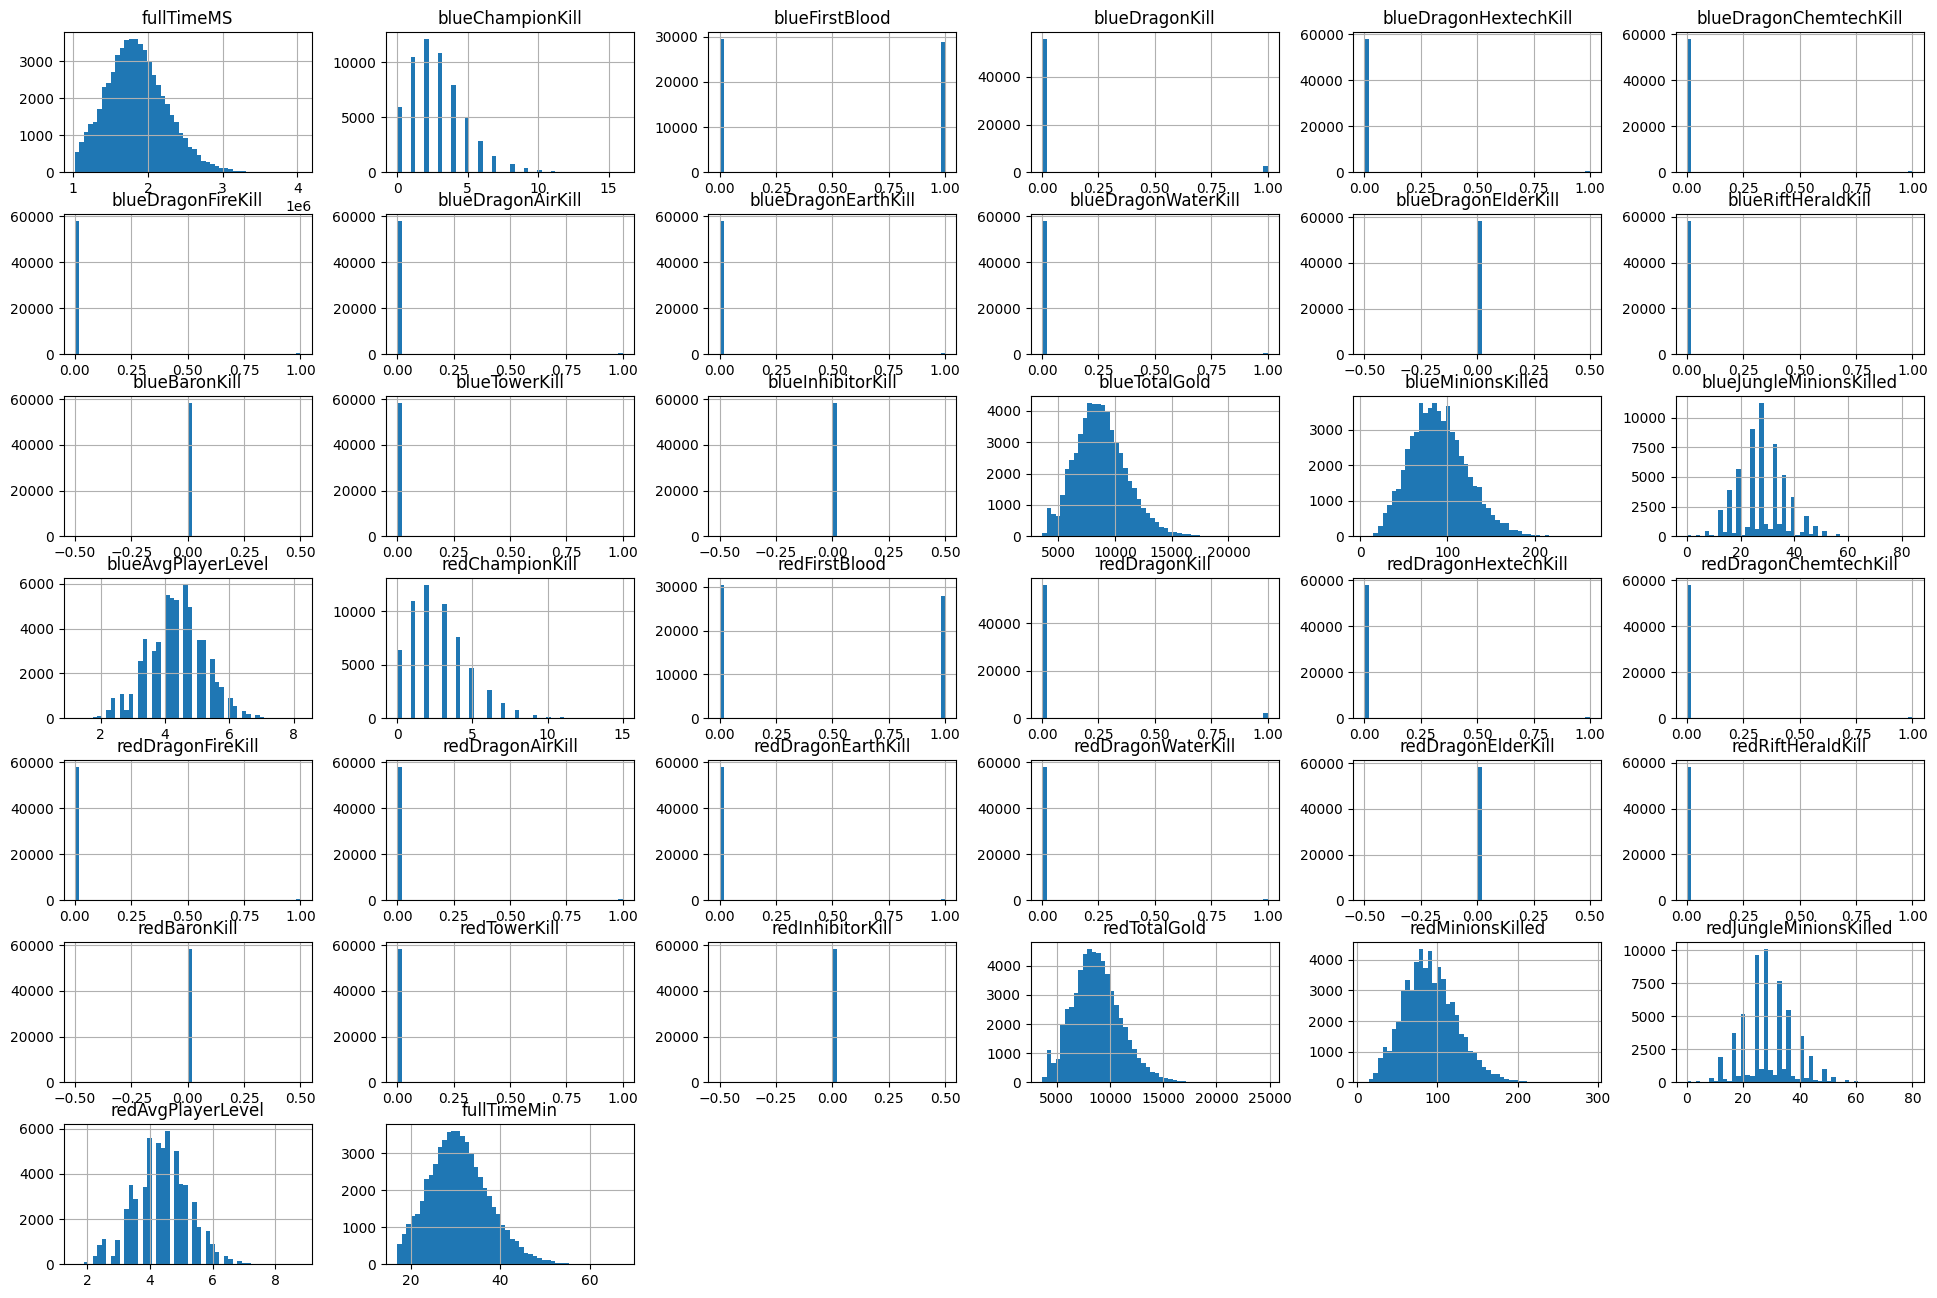

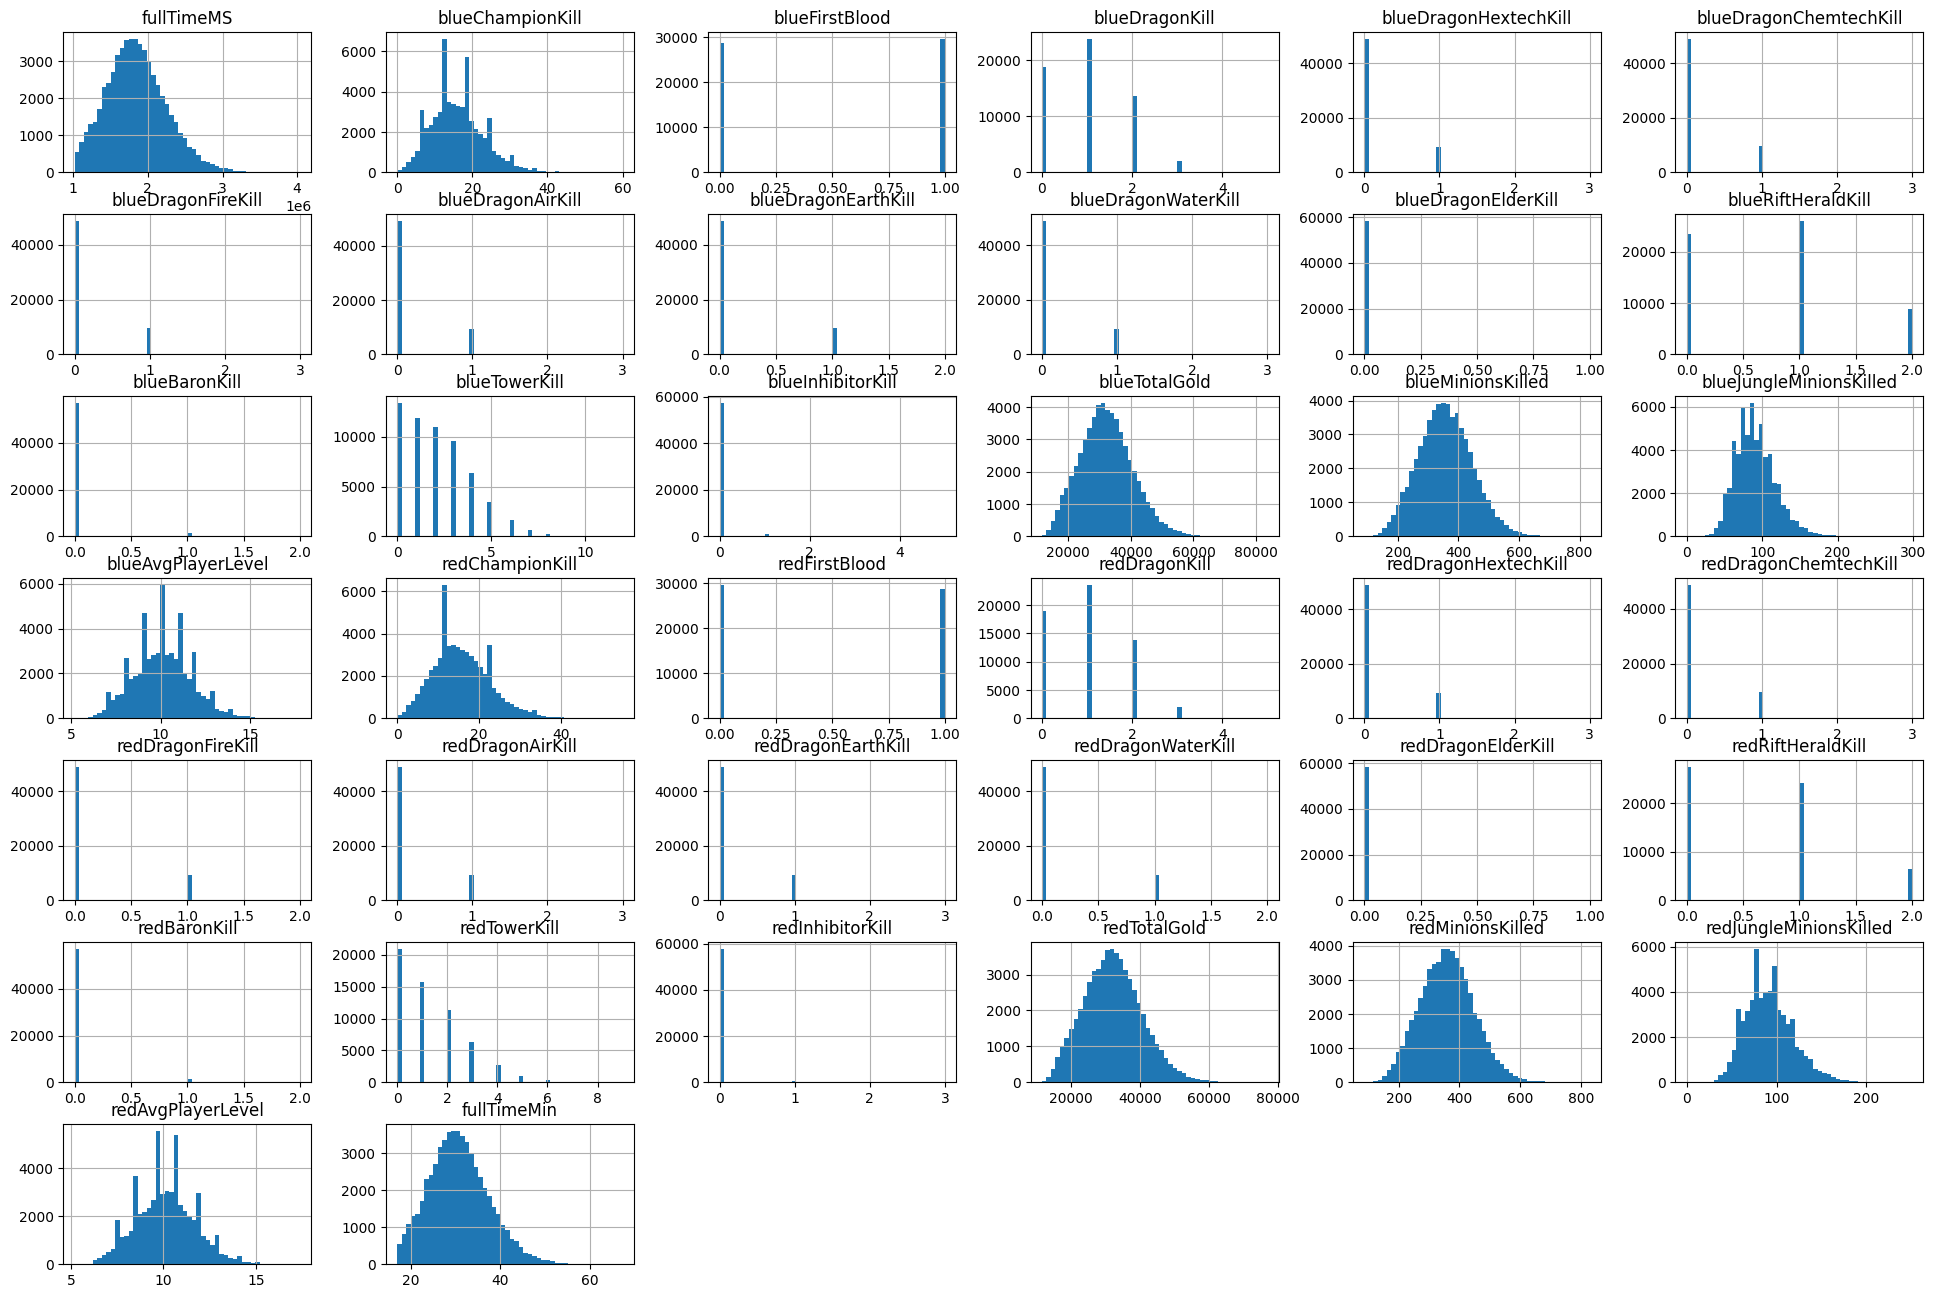

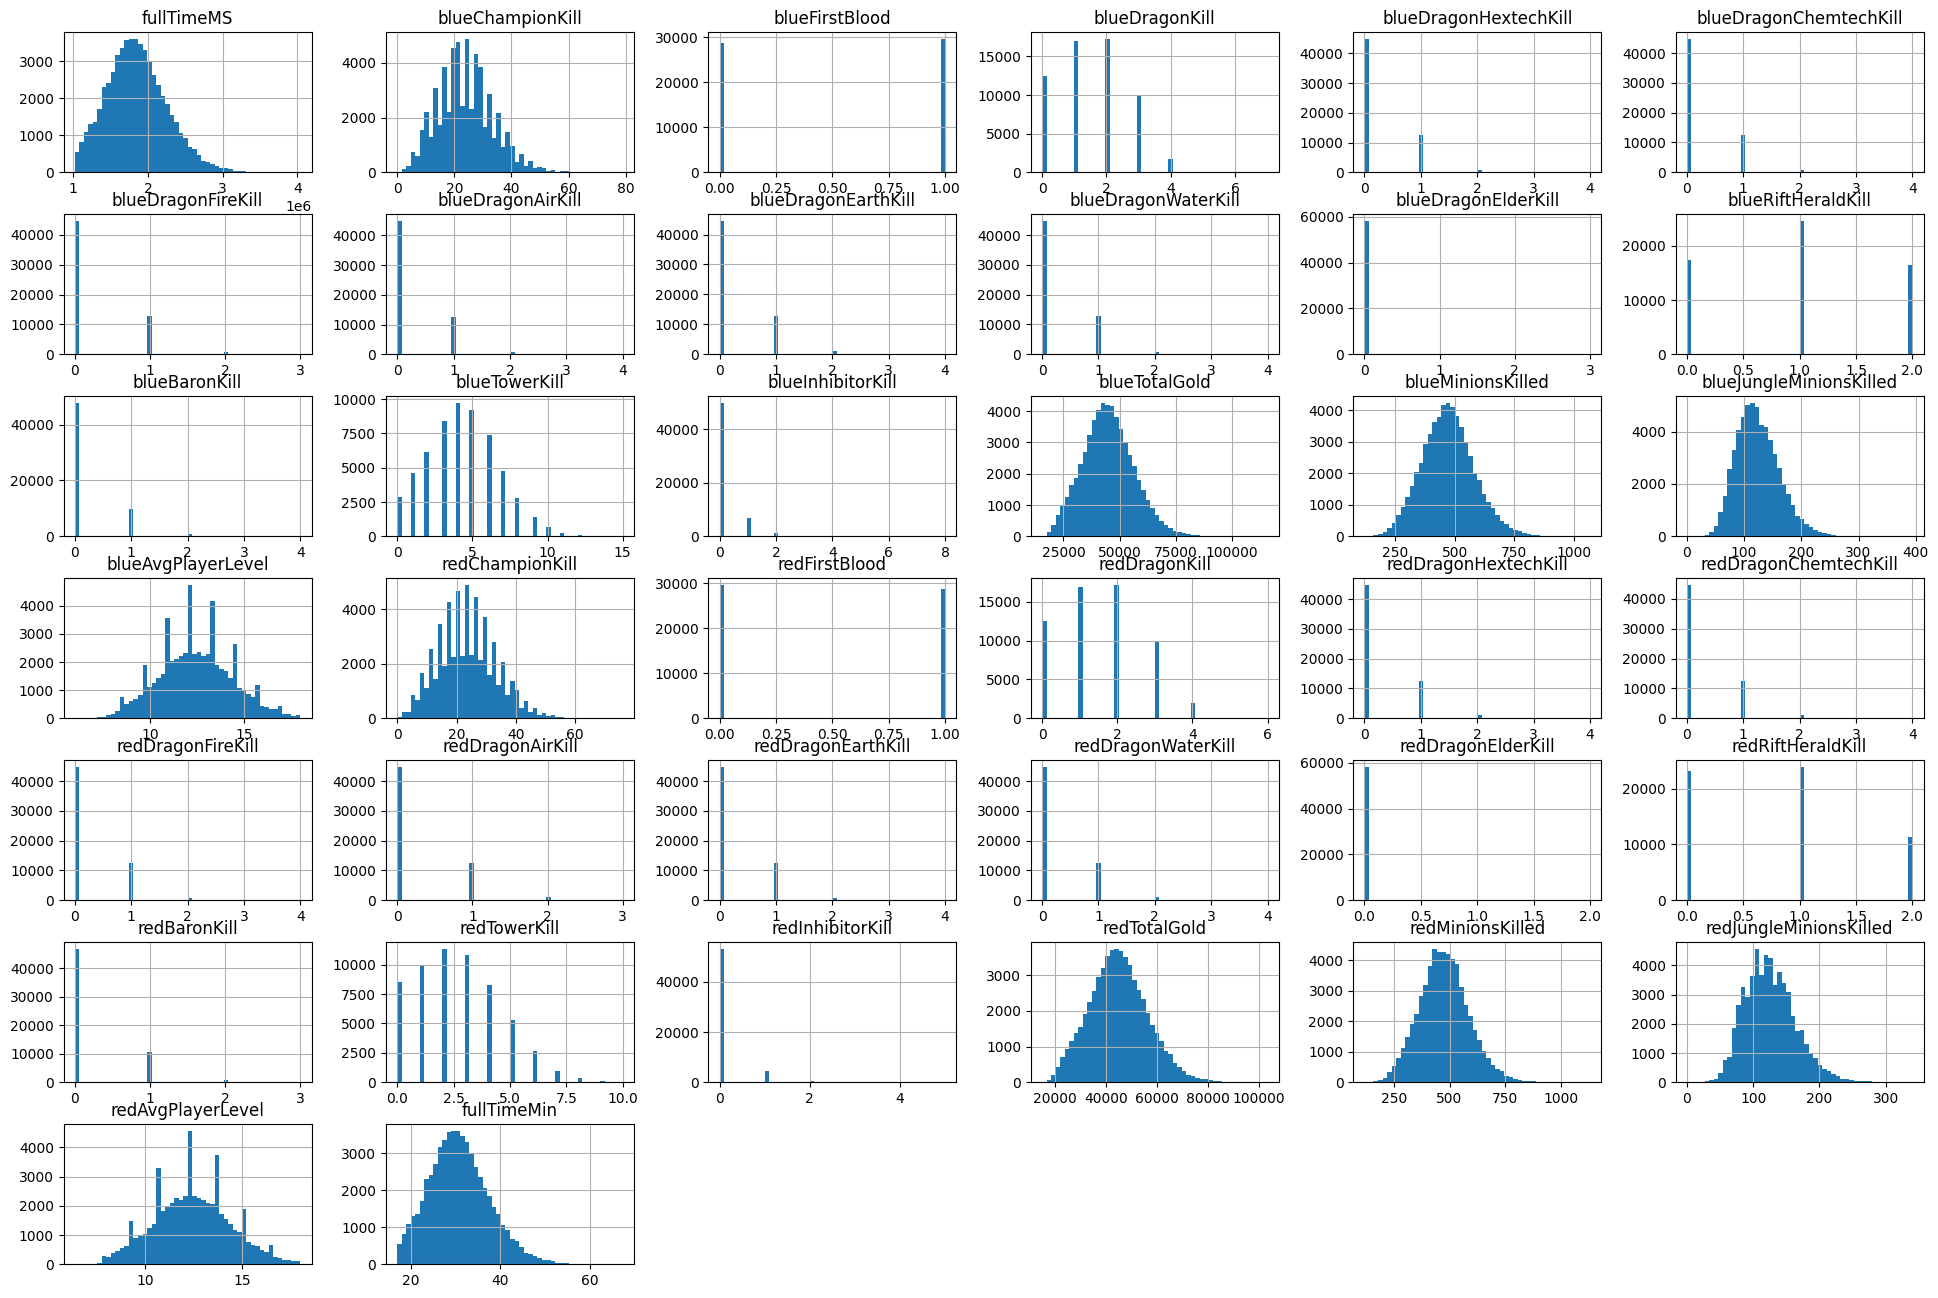

In [112]:
gamesAt20.hist(bins = 50 , figsize=(24 , 16))
plt.show()

gamesAt60.hist(bins = 50 , figsize=(24 , 16))
plt.show()

gamesAt80.hist(bins = 50 , figsize=(24 , 16))
plt.show()

remove the time in min since we only use to show in readable form above

In [113]:
gamesAt20.drop(labels=['fullTimeMin'] , axis=1 , inplace=True)
gamesAt60.drop(labels=['fullTimeMin'] , axis=1 , inplace=True)
gamesAt80.drop(labels=['fullTimeMin'] , axis=1 , inplace=True)

# ML

## Prep data

### Imports

In [114]:
from sklearn.model_selection import train_test_split

### 20%

In [115]:
xb20 = gamesAt20.drop(['blueTotalGold'] , axis=1)
yb20 = gamesAt20['blueTotalGold']

xr20 = gamesAt20.drop(['redTotalGold'] , axis=1)
yr20 = gamesAt20['redTotalGold']

xb_train20 , xb_test20 , yb_train20 , yb_test20 = train_test_split(xb20 , yb20 , test_size=0.2 , random_state=42)
xr_train20 , xr_test20 , yr_train20 , yr_test20 = train_test_split(xr , yr20 , test_size=0.2 , random_state=42)
print(xb_train20.shape , xb_test20.shape , yb_train20.shape , yb_test20.shape)

(46675, 36) (11669, 36) (46675,) (11669,)


### 60%

In [116]:
xb60 = gamesAt60.drop(['blueTotalGold'] , axis=1)
yb60 = gamesAt60['blueTotalGold']

xr60 = gamesAt60.drop(['redTotalGold'] , axis=1)
yr60 = gamesAt60['redTotalGold']

xb_train60 , xb_test60 , yb_train60 , yb_test60 = train_test_split(xb60 , yb60 , test_size=0.2 , random_state=42)
xr_train60 , xr_test60 , yr_train60 , yr_test60 = train_test_split(xr60 , yr60 , test_size=0.2 , random_state=42)
print(xb_train60.shape , xb_test60.shape , yb_train60.shape , yb_test60.shape)

(46675, 36) (11669, 36) (46675,) (11669,)


### 80%

In [117]:
xb80 = gamesAt80.drop(['blueTotalGold'] , axis=1)
yb80 = gamesAt80['blueTotalGold']

xr80 = gamesAt80.drop(['redTotalGold'] , axis=1)
yr80 = gamesAt80['redTotalGold']

xb_train80 , xb_test80 , yb_train80 , yb_test80 = train_test_split(xb80 , yb80 , test_size=0.2 , random_state=42)
xr_train80 , xr_test80 , yr_train80 , yr_test80 = train_test_split(xr80 , yr80 , test_size=0.2 , random_state=42)
print(xb_train80.shape , xb_test80.shape , yb_train80.shape , yb_test80.shape)

(46675, 36) (11669, 36) (46675,) (11669,)


## Regression part

### Imports

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

### 20%

In [119]:
lin_regB20 = LinearRegression()
lin_regB20.fit(xb_train20 , yb_train20)

lin_regR20 = LinearRegression()
lin_regR20.fit(xr_train20 , yr_train20)

LinearRegression()

In [120]:
lr_yb_pred20 = lin_regB20.predict(xb_test20)
lr_yr_pred20 = lin_regR20.predict(xr_test20)

lin_mseB20 = mse(yb_test20 , lr_yb_pred20)
lin_mseR20 = mse(yr_test20 , lr_yr_pred20)

print(lin_mseB20 , lin_mseR20)

75538.40337482552 69141.39794280255


### 60%

In [121]:
lin_regB60 = LinearRegression()
lin_regB60.fit(xb_train60 , yb_train60)

lin_regR60 = LinearRegression()
lin_regR60.fit(xr_train60 , yr_train60)

LinearRegression()

In [122]:
lr_yb_pred60 = lin_regB60.predict(xb_test60)
lr_yr_pred60 = lin_regR60.predict(xr_test60)

lin_mseB60 = mse(yb_test60 , lr_yb_pred60)
lin_mseR60 = mse(yr_test60 , lr_yr_pred60)

print(lin_mseB60 , lin_mseR60)

847478.1295619017 809409.9680023785


### 80%

In [123]:
lin_regB80 = LinearRegression()
lin_regB80.fit(xb_train80 , yb_train80)

lin_regR80 = LinearRegression()
lin_regR80.fit(xr_train80 , yr_train80)

LinearRegression()

In [124]:
lr_yb_pred80 = lin_regB80.predict(xb_test80)
lr_yr_pred80 = lin_regR80.predict(xr_test80)

lin_mseB80 = mse(yb_test80 , lr_yb_pred80)
lin_mseR80 = mse(yr_test80 , lr_yr_pred80)

print(lin_mseB80 , lin_mseR80)

1323530.4349621804 1239734.5260046017


## Plot data

### Imports

In [125]:
import matplotlib.pyplot as plt

### 20%

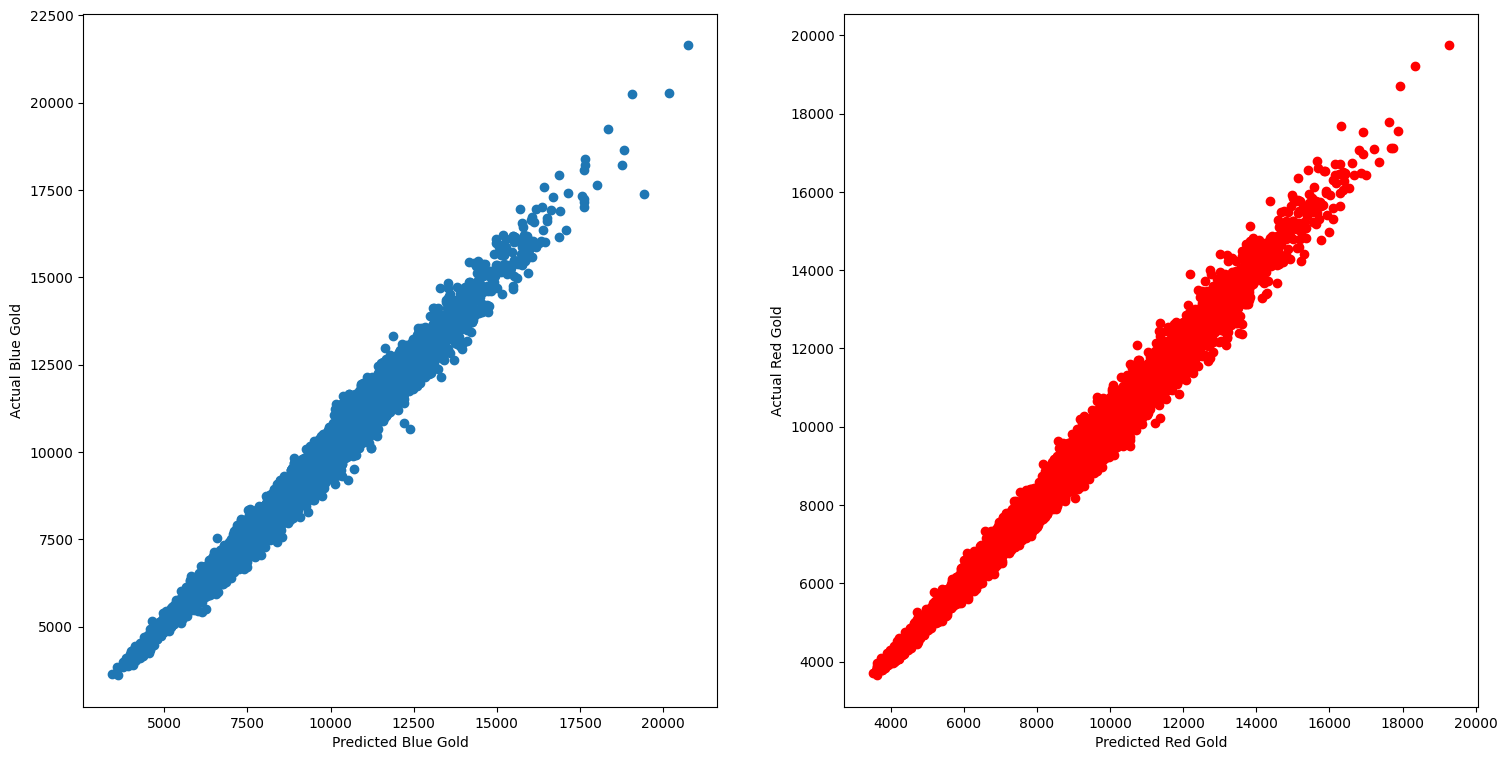

In [146]:
fig20 , axs20 = plt.subplots(1 , 2 , figsize=(18 , 9))

axs20[0].scatter(lr_yb_pred20 , yb_test20)
axs20[0].set_ylabel('Actual Blue Gold')
axs20[0].set_xlabel('Predicted Blue Gold')

axs20[1].scatter(lr_yr_pred20 , yr_test20 , color='red')
axs20[1].set_ylabel('Actual Red Gold')
axs20[1].set_xlabel('Predicted Red Gold')

plt.show()

### 60%

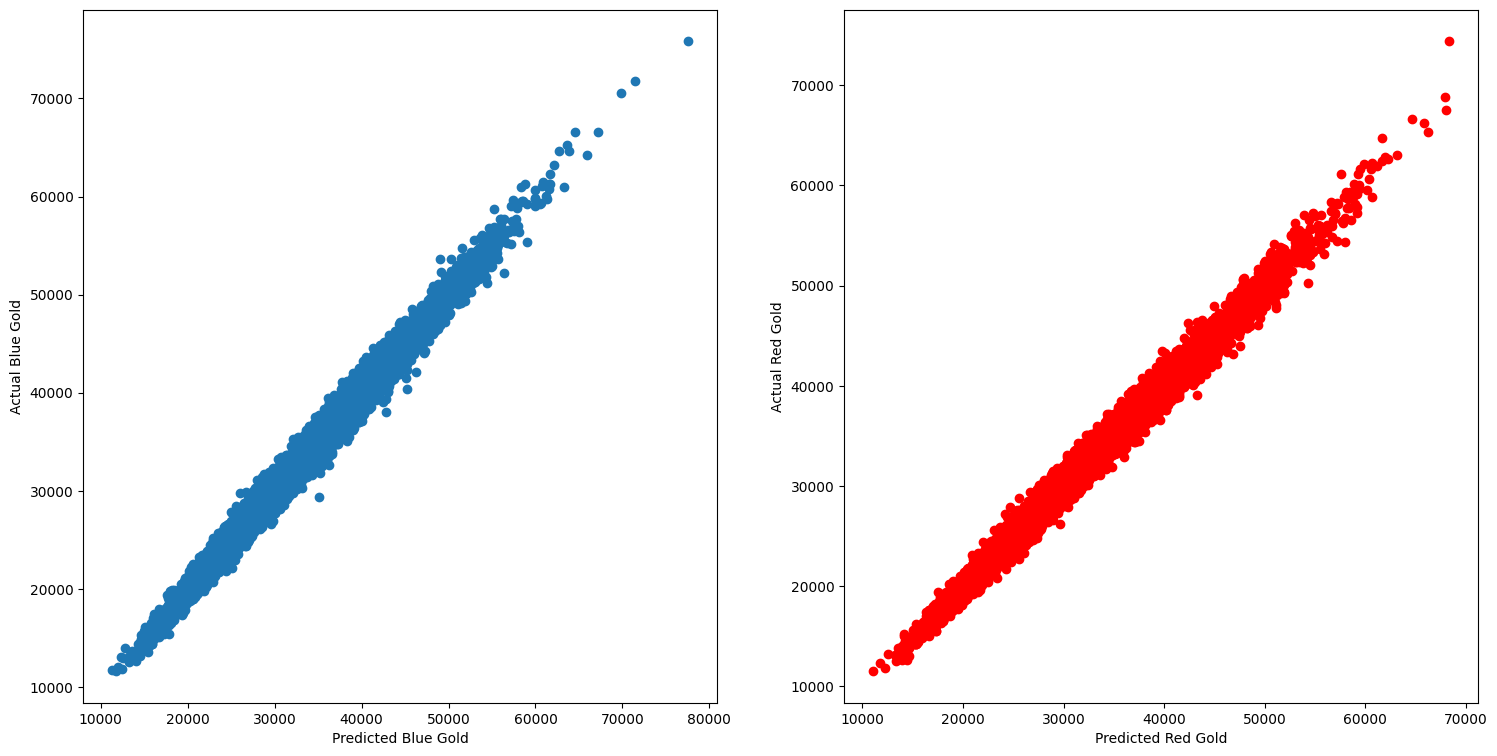

In [147]:
fig60 , axs60 = plt.subplots(1 , 2 , figsize=(18 , 9))

axs60[0].scatter(lr_yb_pred60 , yb_test60)
axs60[0].set_ylabel('Actual Blue Gold')
axs60[0].set_xlabel('Predicted Blue Gold')

axs60[1].scatter(lr_yr_pred60 , yr_test60 , color='red')
axs60[1].set_ylabel('Actual Red Gold')
axs60[1].set_xlabel('Predicted Red Gold')

plt.show()

### 80%

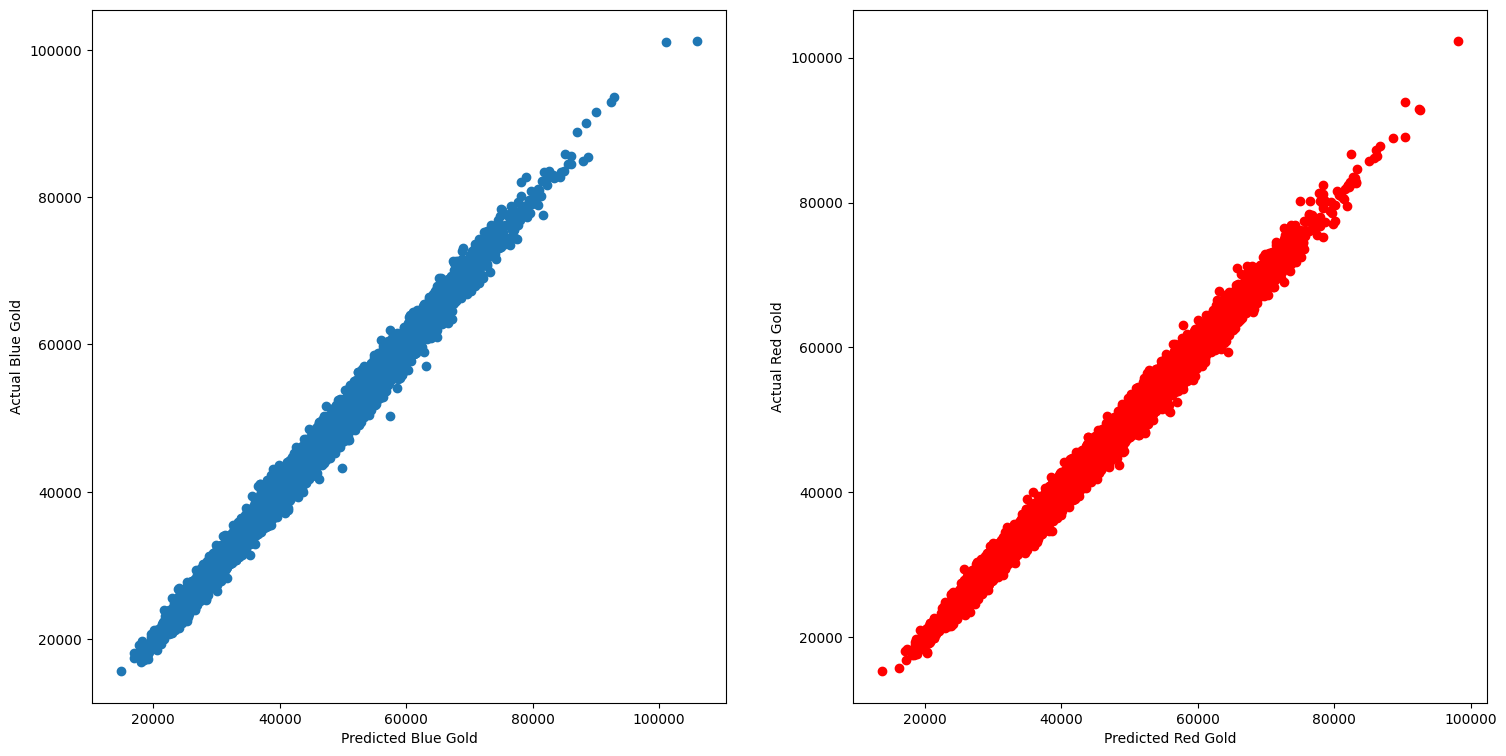

In [148]:
fig80 , axs80 = plt.subplots(1 , 2 , figsize=(18 , 9))

axs80[0].scatter(lr_yb_pred80 , yb_test80)
axs80[0].set_ylabel('Actual Blue Gold')
axs80[0].set_xlabel('Predicted Blue Gold')

axs80[1].scatter(lr_yr_pred80 , yr_test80 , color='red')
axs80[1].set_ylabel('Actual Red Gold')
axs80[1].set_xlabel('Predicted Red Gold')

plt.show()

## Analysis

### Imports

In [149]:
from sklearn.metrics import r2_score

### 20% mse and r^2

In [150]:
r2_b20 = r2_score(yb_test20 , lr_yb_pred20)
r2_r20 = r2_score(yr_test20 , lr_yr_pred20)

print(r2_b20 , r2_r20)
print(lin_mseB20 , lin_mseR20)

0.9851476080904867 0.9863207690134032
75538.40337482552 69141.39794280255


### 60% mse and r^2

In [151]:
r2_b60 = r2_score(yb_test60 , lr_yb_pred60)
r2_r60 = r2_score(yr_test60 , lr_yr_pred60)

print(r2_b60 , r2_r60)
print(lin_mseB60 , lin_mseR60)

0.9877777753866395 0.9884621030406441
847478.1295619017 809409.9680023785


### 80% mse and r^2

In [152]:
r2_b80 = r2_score(yb_test80 , lr_yb_pred80)
r2_r80 = r2_score(yr_test80 , lr_yr_pred80)

print(r2_b80 , r2_r80)
print(lin_mseB80 , lin_mseR80)

0.9896207368133005 0.9904315001961774
1323530.4349621804 1239734.5260046017


## Distribution graphs

### 20%

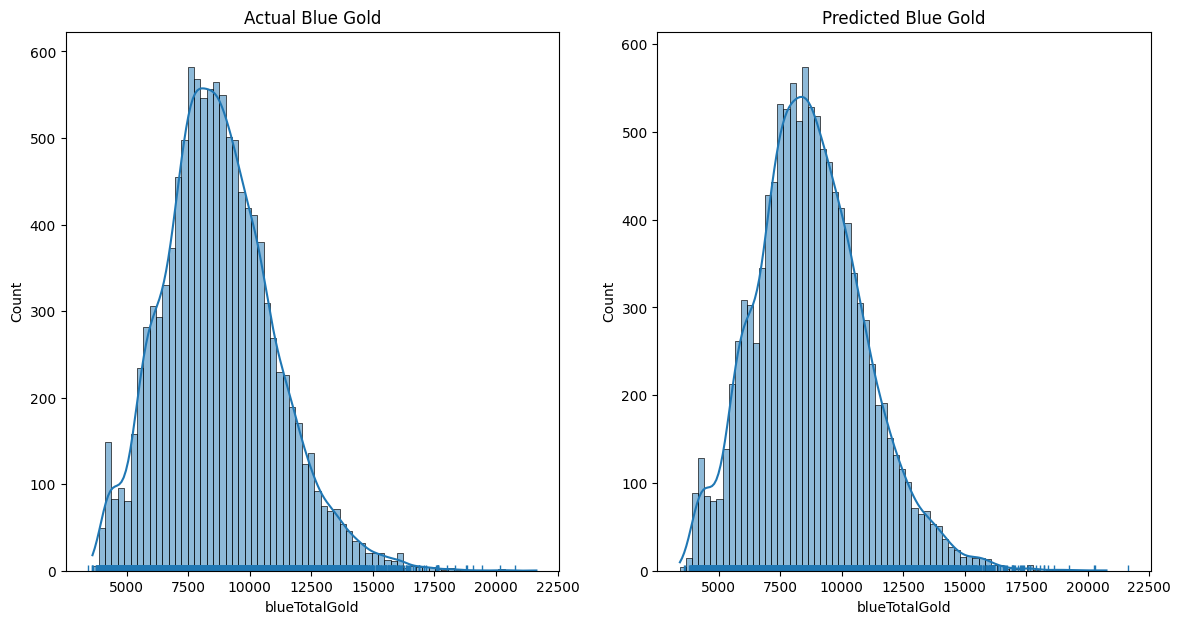

In [185]:
fig20 , axs20 = plt.subplots(1 , 2 , figsize=(14 , 7))

sns.histplot(yb_test20 , ax=axs20[0] , kde=True , bins=70)
sns.rugplot(x=lr_yb_pred20 , ax=axs20[0] , height=0.01)
axs20[0].set_title('Actual Blue Gold')

sns.histplot(lr_yb_pred20 , ax=axs20[1] , kde=True , bins=70)
sns.rugplot(x=yb_test20 , ax=axs20[1] , height=0.01)
axs20[1].set_title('Predicted Blue Gold')

plt.show()

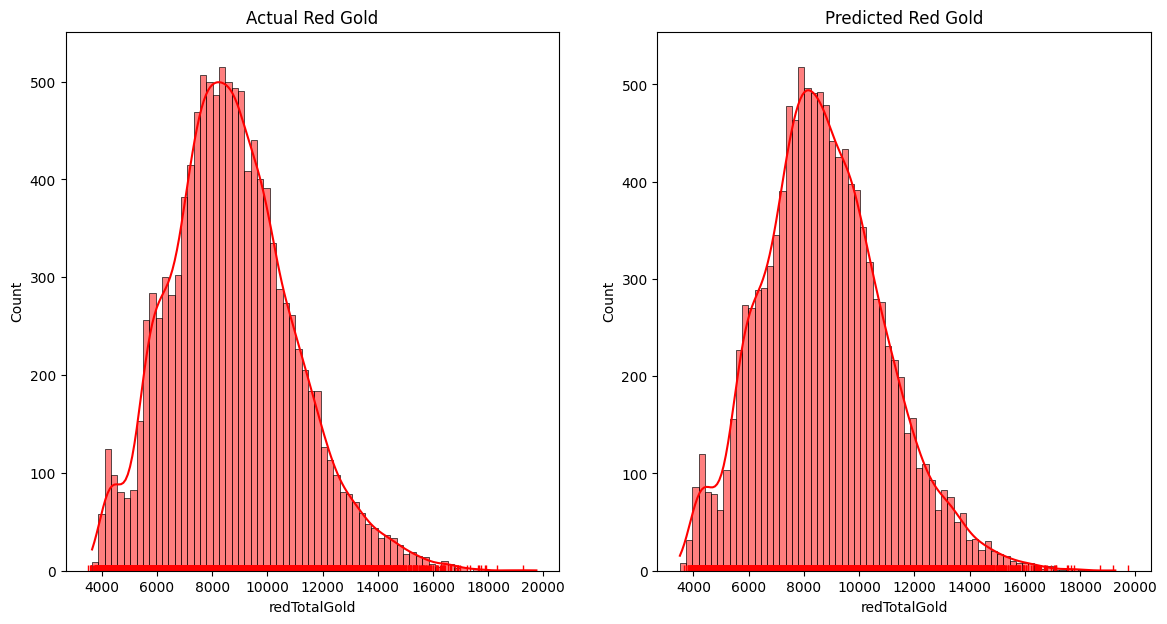

In [186]:
fig20 , axs20 = plt.subplots(1 , 2 , figsize=(14 , 7))

sns.histplot(yr_test20 , ax=axs20[0] , kde=True , bins=70 , color='red')
sns.rugplot(x=lr_yr_pred20 , ax=axs20[0] , height=0.01 , color='red')
axs20[0].set_title('Actual Red Gold')

sns.histplot(lr_yr_pred20 , ax=axs20[1] , kde=True , bins=70 , color='red')
sns.rugplot(x=yr_test20 , ax=axs20[1] , height=0.01 , color='red')
axs20[1].set_title('Predicted Red Gold')

plt.show()

### 60%

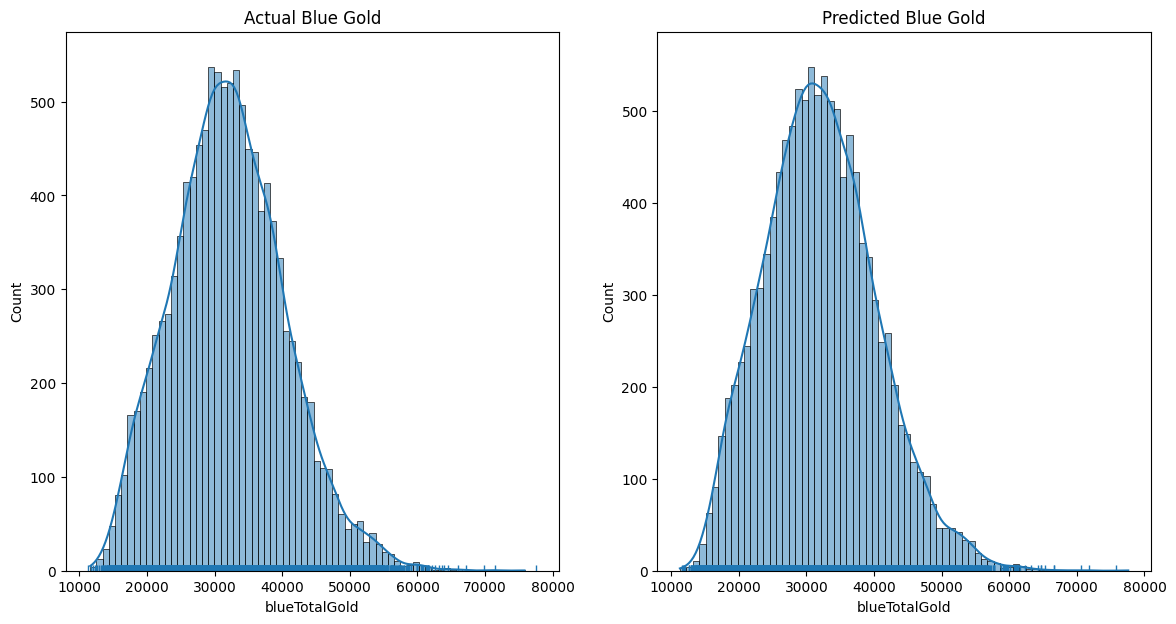

In [187]:
fig60 , axs60 = plt.subplots(1 , 2 , figsize=(14 , 7))

sns.histplot(yb_test60 , ax=axs60[0] , kde=True , bins=70)
sns.rugplot(x=lr_yb_pred60 , ax=axs60[0] , height=0.01)
axs60[0].set_title('Actual Blue Gold')

sns.histplot(x=lr_yb_pred60 , ax=axs60[1] , kde=True , bins=70)
sns.rugplot(yb_test60 , ax=axs60[1] , height=0.01)
axs60[1].set_title('Predicted Blue Gold')

plt.show()

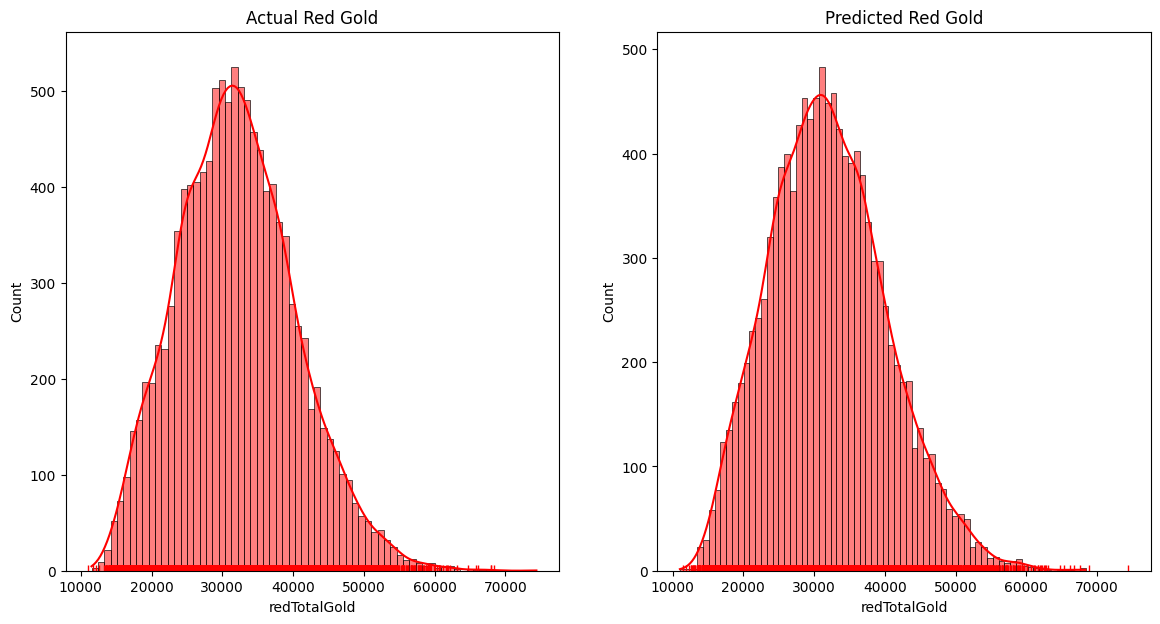

In [188]:
fig20 , axs20 = plt.subplots(1 , 2 , figsize=(14 , 7))

sns.histplot(yr_test60 , ax=axs20[0] , kde=True , bins=70 , color='red')
sns.rugplot(x=lr_yr_pred60 , ax=axs20[0] , height=0.01 , color='red')
axs20[0].set_title('Actual Red Gold')

sns.histplot(lr_yr_pred60 , ax=axs20[1] , kde=True , bins=70 , color='red')
sns.rugplot(x=yr_test60 , ax=axs20[1] , height=0.01 , color='red')
axs20[1].set_title('Predicted Red Gold')

plt.show()

### 80%

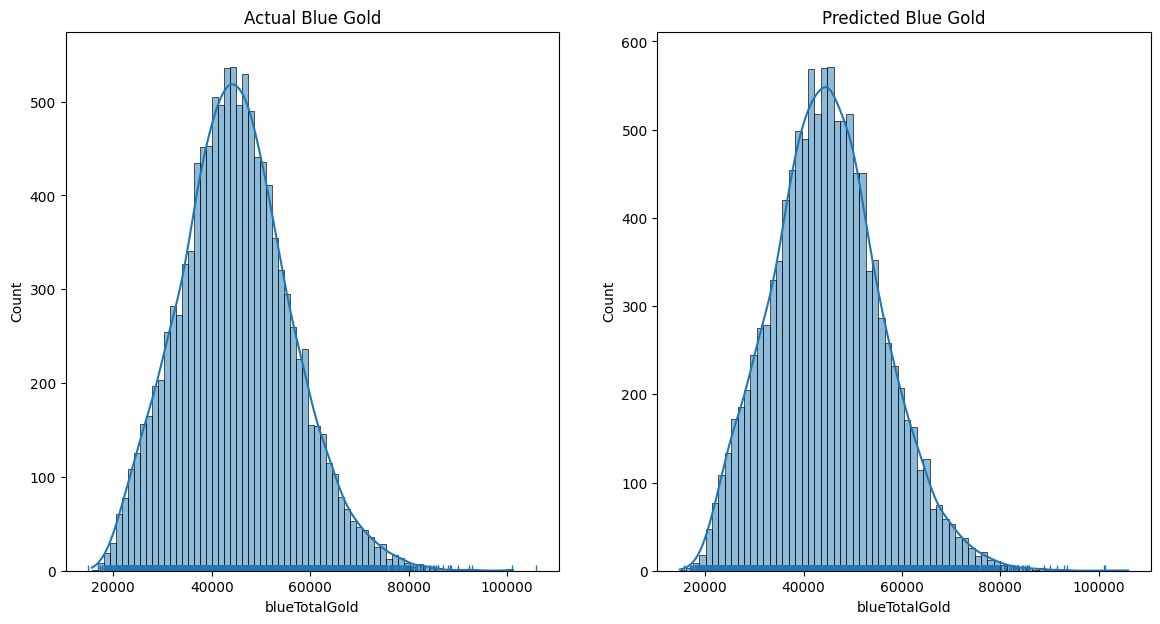

In [189]:
fig80 , axs80 = plt.subplots(1 , 2 , figsize=(14 , 7))

sns.histplot(yb_test80 , ax=axs80[0] , kde=True , bins=70)
sns.rugplot(x=lr_yb_pred80 , ax=axs80[0] , height=0.01)
axs80[0].set_title('Actual Blue Gold')

sns.histplot(lr_yb_pred80 , ax=axs80[1] , kde=True , bins=70)
sns.rugplot(x=yb_test80 , ax=axs80[1] , height=0.01)
axs80[1].set_title('Predicted Blue Gold')

plt.show()

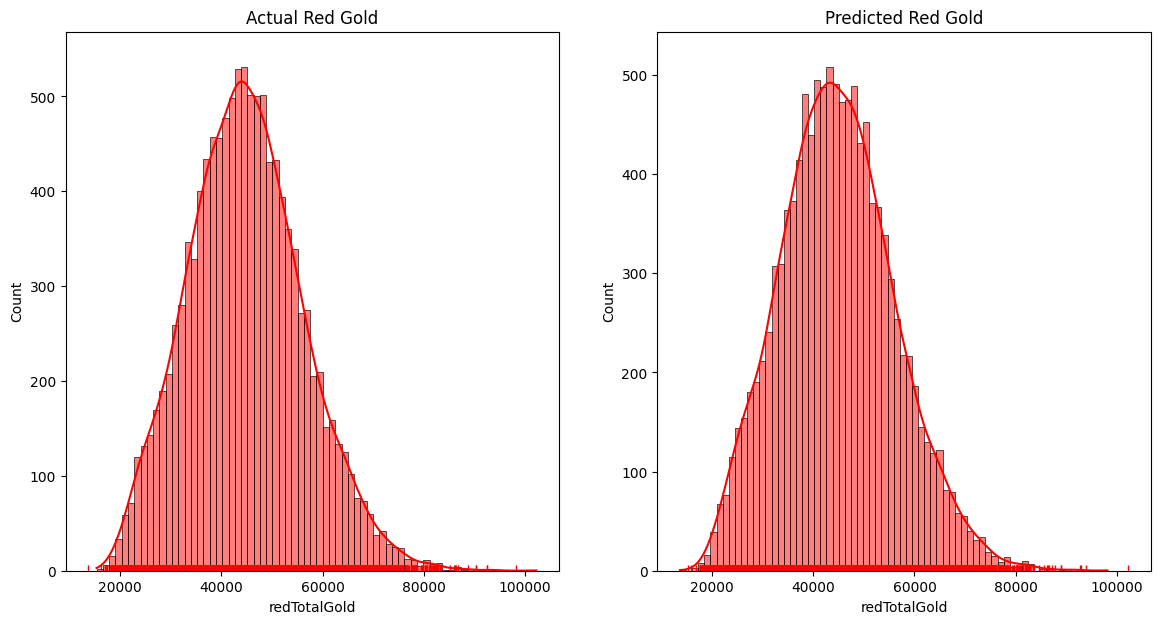

In [190]:
fig20 , axs20 = plt.subplots(1 , 2 , figsize=(14 , 7))

sns.histplot(yr_test80 , ax=axs20[0] , kde=True , bins=70 , color='red')
sns.rugplot(x=lr_yr_pred80 , ax=axs20[0] , height=0.01 , color='red')
axs20[0].set_title('Actual Red Gold')

sns.histplot(lr_yr_pred80 , ax=axs20[1] , kde=True , bins=70 , color='red')
sns.rugplot(x=yr_test80 , ax=axs20[1] , height=0.01 , color='red')
axs20[1].set_title('Predicted Red Gold')

plt.show()